In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder

In [3]:
df = pd.read_csv('titanic3.csv')
df.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1.0,1.0,"Allen, Miss. Elisabeth Walton",female,29.0000,0.0,0.0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1.0,1.0,"Allison, Master. Hudson Trevor",male,0.9167,1.0,2.0,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1.0,0.0,"Allison, Miss. Helen Loraine",female,2.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1.0,0.0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1.0,0.0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


In [4]:
df.columns

Index(['pclass', 'survived', 'name', 'sex', 'age', 'sibsp', 'parch', 'ticket',
       'fare', 'cabin', 'embarked', 'boat', 'body', 'home.dest'],
      dtype='object')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000075E2A6C390>,
      dtype=object)

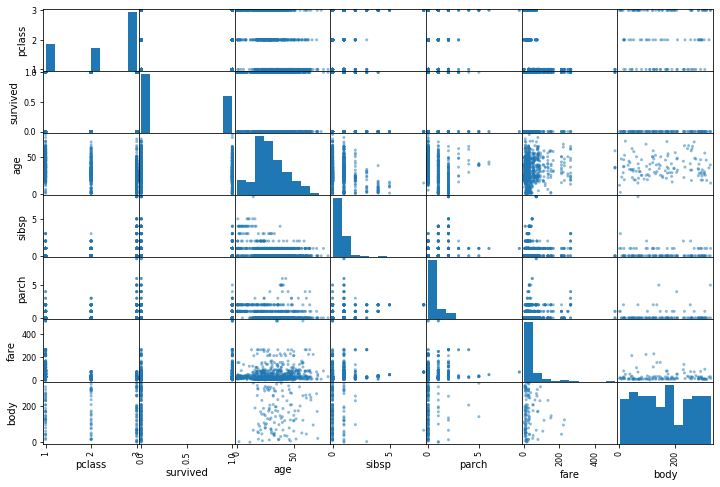

In [6]:
from pandas.plotting import scatter_matrix
fig1 = scatter_matrix(df, figsize=(12, 8))
fig1

In [8]:

def percent_survived(series):
    

df.groupby(['pclass', 'sex']).size().reset_index()
#fig2 = sns.barplot(x='pclass', y=)

,pclass,sex,0
0,1.0,female,144
1,1.0,male,179
2,2.0,female,106
3,2.0,male,171
4,3.0,female,216
5,3.0,male,493


In [144]:
df.describe()

,pclass,survived,age,sibsp,parch,fare,body
count,1309.000000,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000,121.000000
mean,2.294882,0.381971,29.881135,0.498854,0.385027,33.295479,160.809917
std,0.837836,0.486055,14.413500,1.041658,0.865560,51.758668,97.696922
min,1.000000,0.000000,0.166700,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,21.000000,0.000000,0.000000,7.895800,72.000000
50%,3.000000,0.000000,28.000000,0.000000,0.000000,14.454200,155.000000
75%,3.000000,1.000000,39.000000,1.000000,0.000000,31.275000,256.000000
max,3.000000,1.000000,80.000000,8.000000,9.000000,512.329200,328.000000


In [145]:
df.shape

(1310, 14)

In [146]:
df_ml = df.drop(['body', 'home.dest', 'boat', 'name', 'cabin', 'ticket'], axis=1)

In [147]:
df_ml[['sex', 'embarked']] = df_ml[['sex', 'embarked']].fillna('n/a')

In [148]:
df_ml.head(10)

,pclass,survived,sex,age,sibsp,parch,fare,embarked
0,1.0,1.0,female,29.0000,0.0,0.0,211.3375,S
1,1.0,1.0,male,0.9167,1.0,2.0,151.5500,S
2,1.0,0.0,female,2.0000,1.0,2.0,151.5500,S
3,1.0,0.0,male,30.0000,1.0,2.0,151.5500,S
4,1.0,0.0,female,25.0000,1.0,2.0,151.5500,S
5,1.0,1.0,male,48.0000,0.0,0.0,26.5500,S
6,1.0,1.0,female,63.0000,1.0,0.0,77.9583,S
7,1.0,0.0,male,39.0000,0.0,0.0,0.0000,S
8,1.0,1.0,female,53.0000,2.0,0.0,51.4792,S
9,1.0,0.0,male,71.0000,0.0,0.0,49.5042,C


In [149]:
cat_to_int = pd.get_dummies(df_ml[['sex', 'embarked']])
cat_to_int = cat_to_int.drop(['sex_n/a', 'embarked_n/a'], axis=1)
cat_to_int
#onehot = OneHotEncoder(dtype=np.int, sparse=False)
#cat_to_int = pd.DataFrame(onehot.fit_transform(df[['sex', 'embarked']]),
#columns=['F', 'M', 'S', 'C', 'Q'])
df_ml = pd.concat([df_ml, cat_to_int], axis=1).drop(['sex', 'embarked'], axis=1)
df_ml.shape

(1310, 11)

In [153]:
df_ml.dropna(axis=0,how='all')
df_ml['survived'].dropna()

array(['pclass', 'survived', 'age', 'sibsp', 'parch', 'fare',
       'sex_female', 'sex_male', 'embarked_C', 'embarked_Q', 'embarked_S'],
      dtype=object)

In [154]:
imp = SimpleImputer(missing_values=np.nan, strategy='mean')
df_ml_i = imp.fit_transform(df_ml)
df_ml_i = pd.DataFrame(df_ml_i, columns=df_ml.columns.values)

In [155]:

X = df_ml_i.drop('survived', axis=1)
y = df_ml_i['survived']
X

,pclass,age,sibsp,parch,fare,sex_female,sex_male,embarked_C,embarked_Q,embarked_S
0,1.000000,29.000000,0.000000,0.000000,211.337500,1.0,0.0,0.0,0.0,1.0
1,1.000000,0.916700,1.000000,2.000000,151.550000,0.0,1.0,0.0,0.0,1.0
2,1.000000,2.000000,1.000000,2.000000,151.550000,1.0,0.0,0.0,0.0,1.0
3,1.000000,30.000000,1.000000,2.000000,151.550000,0.0,1.0,0.0,0.0,1.0
4,1.000000,25.000000,1.000000,2.000000,151.550000,1.0,0.0,0.0,0.0,1.0
5,1.000000,48.000000,0.000000,0.000000,26.550000,0.0,1.0,0.0,0.0,1.0
6,1.000000,63.000000,1.000000,0.000000,77.958300,1.0,0.0,0.0,0.0,1.0
7,1.000000,39.000000,0.000000,0.000000,0.000000,0.0,1.0,0.0,0.0,1.0
8,1.000000,53.000000,2.000000,0.000000,51.479200,1.0,0.0,0.0,0.0,1.0
9,1.000000,71.000000,0.000000,0.000000,49.504200,0.0,1.0,1.0,0.0,0.0


In [156]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [157]:
lin_reg = LinearRegression().fit(X_train, y_train)
lin_reg.score(X_test, y_test)

0.3822103517282678